In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data_Main.csv')

In [3]:
print("Dataset Shape:", data.shape)
print("Data Types:\n", data.dtypes)

Dataset Shape: (9565, 17)
Data Types:
 Area               float64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object


In [4]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Area               56
Perimeter          38
MajorAxisLength    38
MinorAxisLength    38
AspectRation       38
Eccentricity       38
ConvexArea         38
EquivDiameter      38
Extent             38
Solidity           87
roundness          38
Compactness        38
ShapeFactor1       38
ShapeFactor2       38
ShapeFactor3       38
ShapeFactor4       38
Class              38
dtype: int64


In [5]:
print('Summary:\n' ,data.describe)

Summary:
 <bound method NDFrame.describe of          Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0     53663.0    914.023       378.600140       181.647777      2.084254   
1     81701.0   1069.534       405.402871       258.923147      1.565727   
2     40693.0    770.418       290.248493       179.230720      1.619413   
3     30835.0    663.731       250.374047       157.372914      1.590960   
4     66997.0    978.189       381.136300       226.262814      1.684485   
...       ...        ...              ...              ...           ...   
9560  43317.0    778.174       289.881798       190.685213      1.520211   
9561  46382.0    776.201       268.469151       220.310049      1.218597   
9562  33867.0    682.352       252.315624       171.458195      1.471587   
9563  83168.0   1154.625       400.255941       265.054216      1.510091   
9564  27888.0    618.792       228.801308       155.494565      1.471442   

      Eccentricity  ConvexArea  EquivDiamet

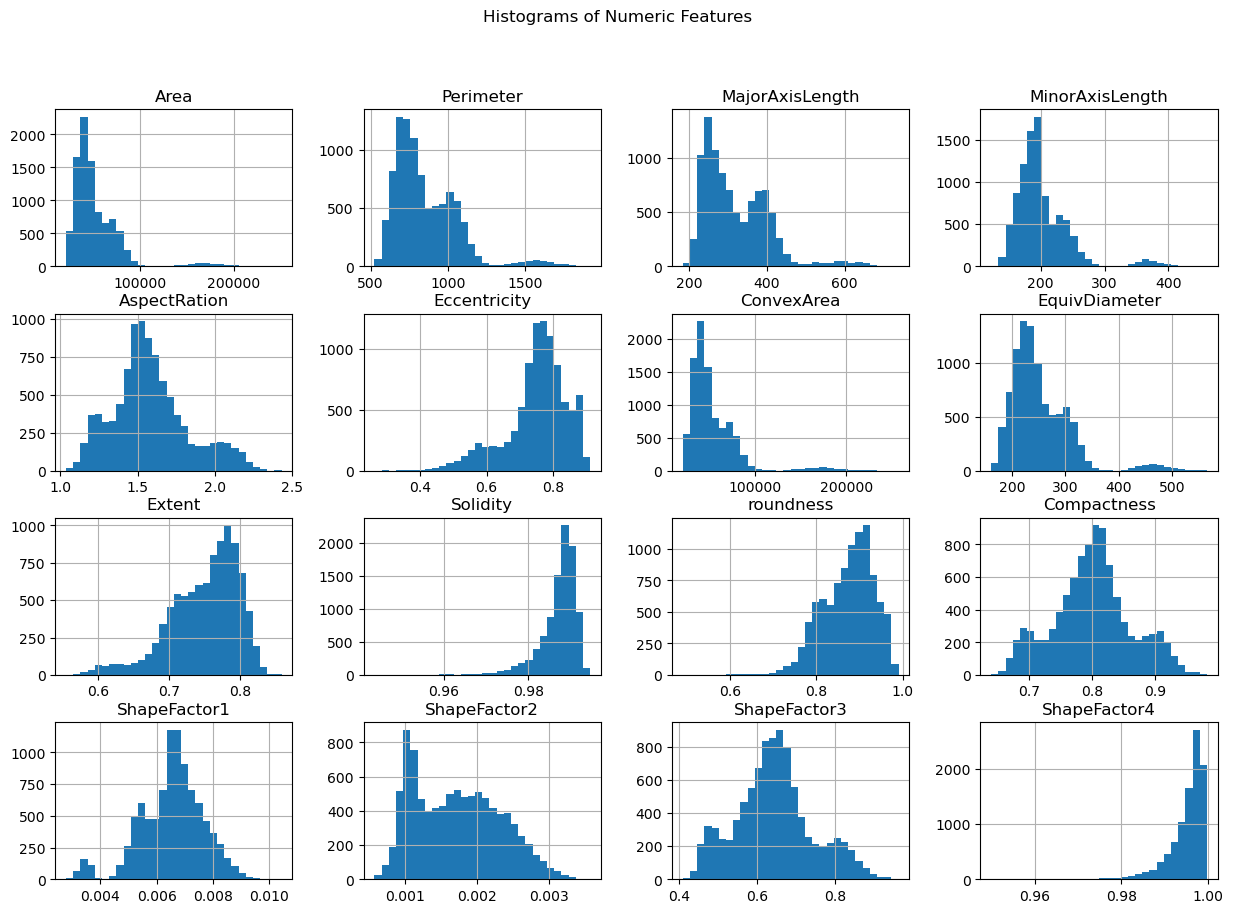

In [6]:
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

### First 4 columns seem correlated. Their graphs seem approximate to each other.

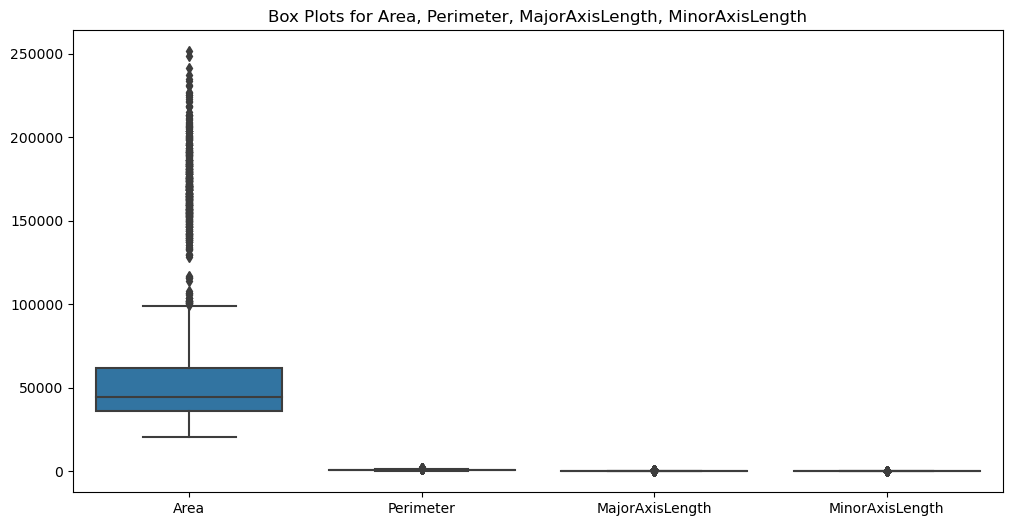

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength']])
plt.title('Box Plots for Area, Perimeter, MajorAxisLength, MinorAxisLength')
plt.show()

### Perimeter, MajorAxisLength and MinorAxisLength values changes are not significant compared to "Area"s values change.

Number of outliers according to Z-Score:  0


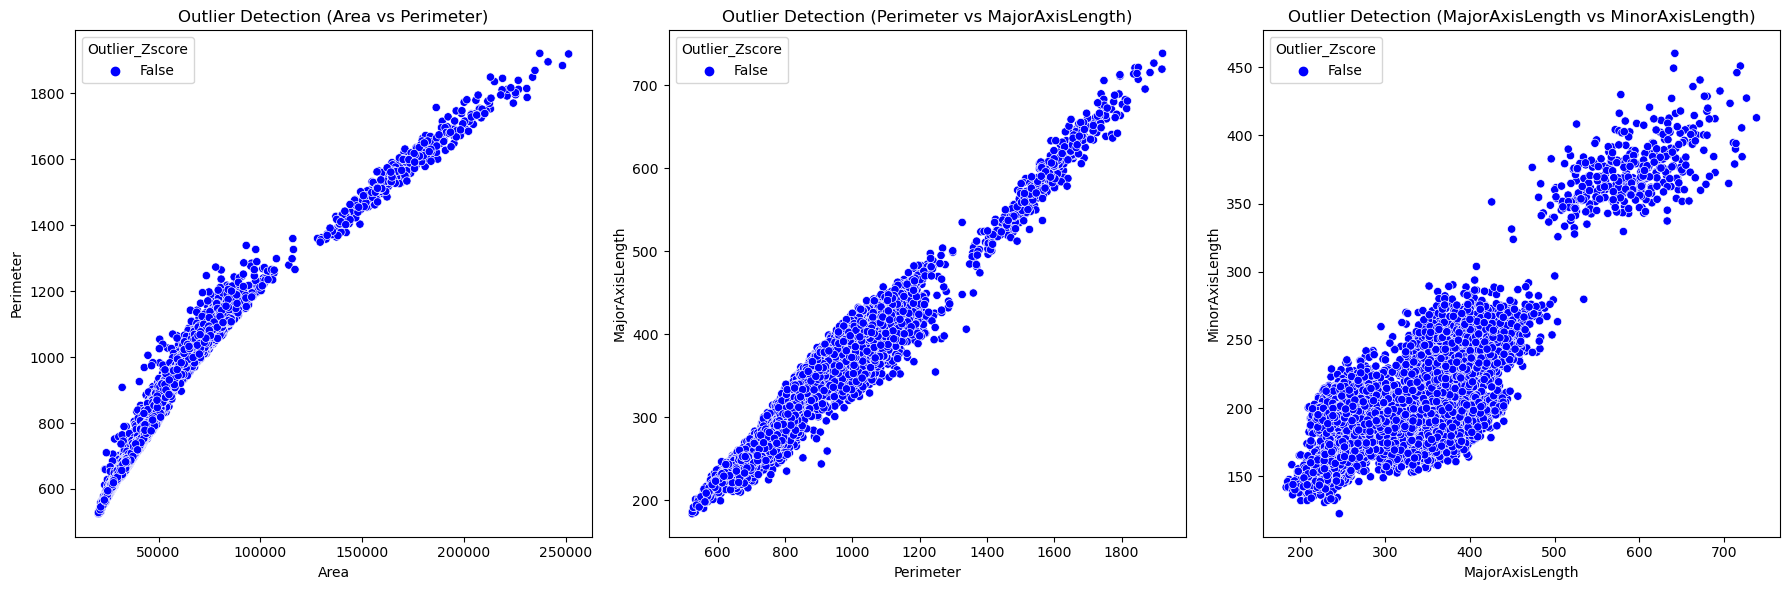

In [8]:
# Z-score method 
from scipy import stats

z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
threshold = 3
data['Outlier_Zscore'] = (z_scores > threshold).any(axis=1)

# Plotting three scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


# Area vs Perimeter
sns.scatterplot(data=data, x='Area', y='Perimeter', hue='Outlier_Zscore', palette={True: 'red', False: 'blue'}, ax=axes[0])
axes[0].set_title('Outlier Detection (Area vs Perimeter)')

# Perimeter vs MajorAxisLength
sns.scatterplot(data=data, x='Perimeter', y='MajorAxisLength', hue='Outlier_Zscore', palette={True: 'red', False: 'blue'}, ax=axes[1])
axes[1].set_title('Outlier Detection (Perimeter vs MajorAxisLength)')

# MajorAxisLength vs MinorAxisLength
sns.scatterplot(data=data, x='MajorAxisLength', y='MinorAxisLength', hue='Outlier_Zscore', palette={True: 'red', False: 'blue'}, ax=axes[2])
axes[2].set_title('Outlier Detection (MajorAxisLength vs MinorAxisLength)')

num_outliers = data['Outlier_Zscore'].sum()
print("Number of outliers according to Z-Score: ", num_outliers)

plt.tight_layout()
plt.show()



### According to these 3 graphs and 4 variables, there are "0"(zero) outliers for these 4 columns.

In [9]:
data_additional = pd.read_csv('Data_Additional.csv')

print("Main Dataset Columns:", data.columns)
print("Additional Dataset Columns:", data_additional.columns)


Main Dataset Columns: Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class', 'Outlier_Zscore'],
      dtype='object')
Additional Dataset Columns: Index(['Area', 'Perimeter', 'Length', 'Width', 'AspectRation', 'Class',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'Eccentricity', 'Color'],
      dtype='object')


In [10]:
print(data_additional.shape)

(4099, 18)


In [11]:
missing_in_main = set(data_additional.columns) - set(data.columns)
print("Columns in additional dataset but not in main:", missing_in_main)
missing_in_additional =  set(data.columns) - set(data_additional.columns) 
print("Columns in main dataset but not in additional", missing_in_additional)

Columns in additional dataset but not in main: {'Length', 'Color', 'Width'}
Columns in main dataset but not in additional {'MinorAxisLength', 'Outlier_Zscore', 'MajorAxisLength'}


In [12]:
# Add missing columns to main dataset with default values (e.g., NaN)
for col in ['Width', 'Color', 'Length']:
    if col not in data.columns:
        data[col] = pd.NA

# Add missing columns to additional dataset with placeholder values
for col in ['MinorAxisLength', 'Outlier', 'MajorAxisLength', 'Outlier_Zscore']:
    if col not in data_additional.columns:
        data_additional[col] = pd.NA


# Concatenate the datasets
merged_data = pd.concat([data, data_additional], ignore_index=True)


In [13]:
print(merged_data.isnull())

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      False      False            False            False         False   
1      False      False            False            False         False   
2      False      False            False            False         False   
3      False      False            False            False         False   
4      False      False            False            False         False   
...      ...        ...              ...              ...           ...   
13659  False      False             True             True         False   
13660  False      False             True             True         False   
13661  False      False             True             True         False   
13662  False      False             True             True         False   
13663  False      False             True             True         False   

       Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  ...  \
0             False       

# Data Cleaning :

In [14]:
# Calculate the mean values of MajorAxisLength and MinorAxisLength 
major_axis_mean = merged_data['MajorAxisLength'].mean()
minor_axis_mean = merged_data['MinorAxisLength'].mean()

# Fill NaN values with the mean values
merged_data['MajorAxisLength'].fillna(major_axis_mean, inplace=True)
merged_data['MinorAxisLength'].fillna(minor_axis_mean, inplace=True)




In [15]:
print(merged_data.isnull())

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      False      False            False            False         False   
1      False      False            False            False         False   
2      False      False            False            False         False   
3      False      False            False            False         False   
4      False      False            False            False         False   
...      ...        ...              ...              ...           ...   
13659  False      False            False            False         False   
13660  False      False            False            False         False   
13661  False      False            False            False         False   
13662  False      False            False            False         False   
13663  False      False            False            False         False   

       Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  ...  \
0             False       

In [16]:
merged_data.isnull()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Outlier_Zscore,Width,Color,Length,Outlier
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13659,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
13660,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
13661,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
13662,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


# Data Scaling:

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler()

numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
merged_data[numeric_columns] = scaler.fit_transform(merged_data[numeric_columns])

print(merged_data)

           Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      0.141945   0.266519         0.351639         0.175119      0.753776   
1      0.261665   0.372987         0.399972         0.403957      0.384833   
2      0.086564   0.168202         0.192316         0.167961      0.423032   
3      0.044471   0.095161         0.120411         0.103233      0.402787   
4      0.198880   0.310449         0.356212         0.307239      0.469332   
...         ...        ...              ...              ...           ...   
13659  0.091983   0.158294         0.246253         0.237253      0.364710   
13660  0.092000   0.151568         0.246253         0.237253      0.266477   
13661  0.092124   0.165015         0.246253         0.237253      0.342539   
13662  0.092243   0.151974         0.246253         0.237253      0.260011   
13663  0.092739   0.160605         0.246253         0.237253      0.318558   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solid

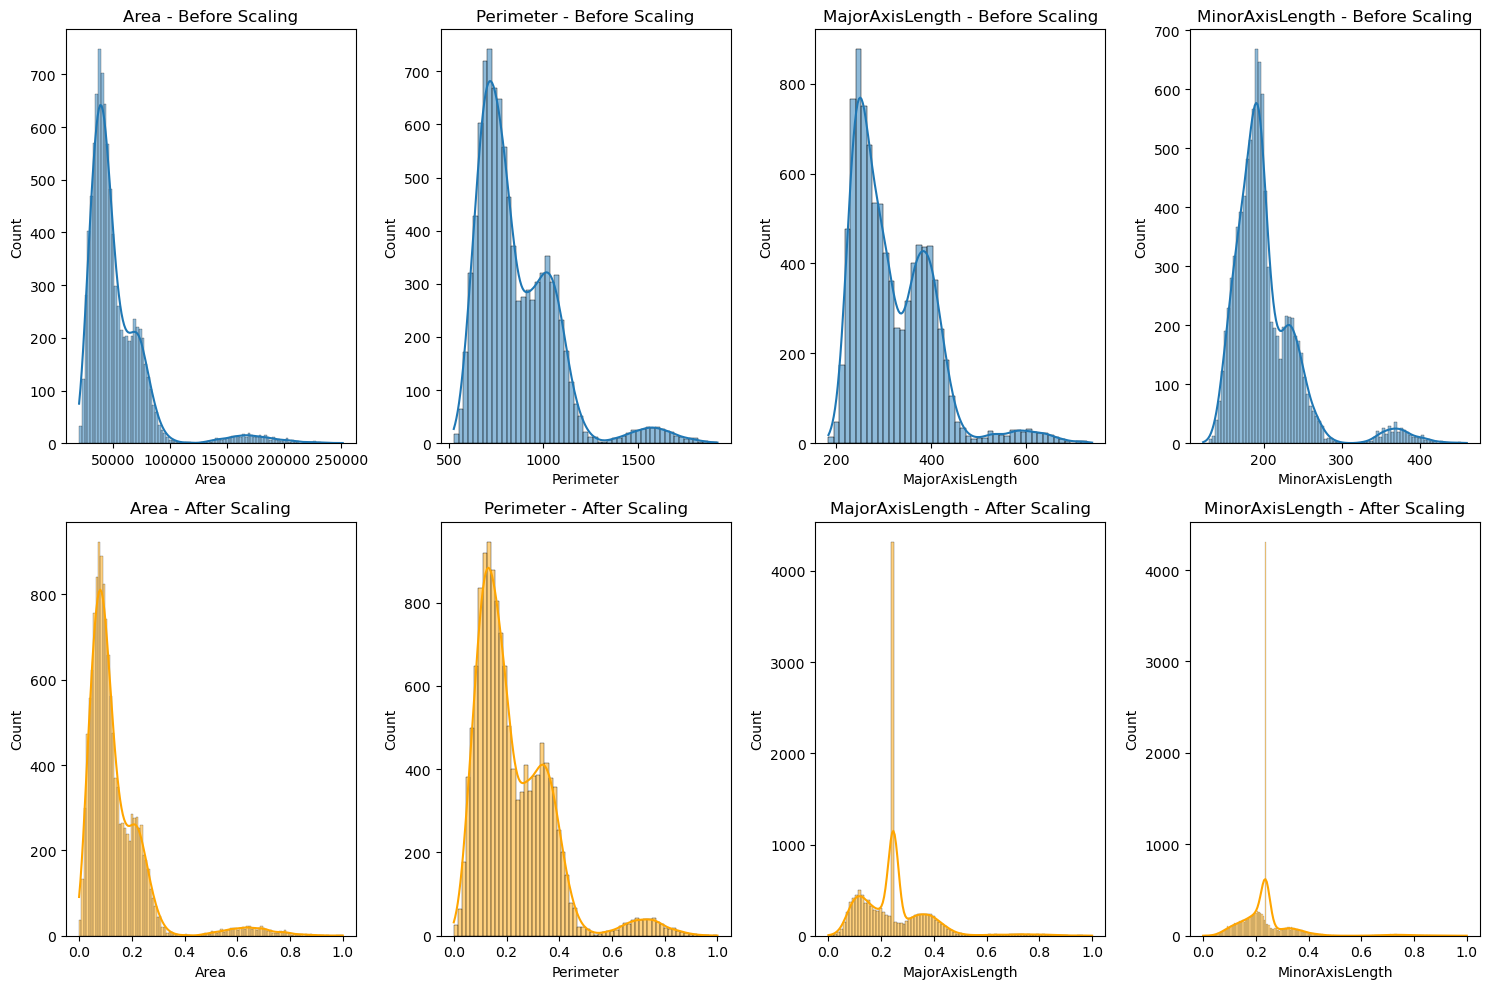

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Key features to plot distributions
key_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength']

# Plot original (before scaling) and scaled distributions side by side
fig, axes = plt.subplots(2, len(key_features), figsize=(15, 10))

for i, feature in enumerate(key_features):
    # Plot original distribution
    sns.histplot(data[feature], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'{feature} - Before Scaling')

    # Plot scaled distribution
    sns.histplot(merged_data[feature], kde=True, ax=axes[1, i], color='orange')
    axes[1, i].set_title(f'{feature} - After Scaling')

plt.tight_layout()
plt.show()


### The distribution shapes of each feature remain the same, but their values are now scaled between 0 and 1. 

### Since we applied Min-Max Scaling, features are now easier to compare on the same scale, which benefits distance-based analysis.

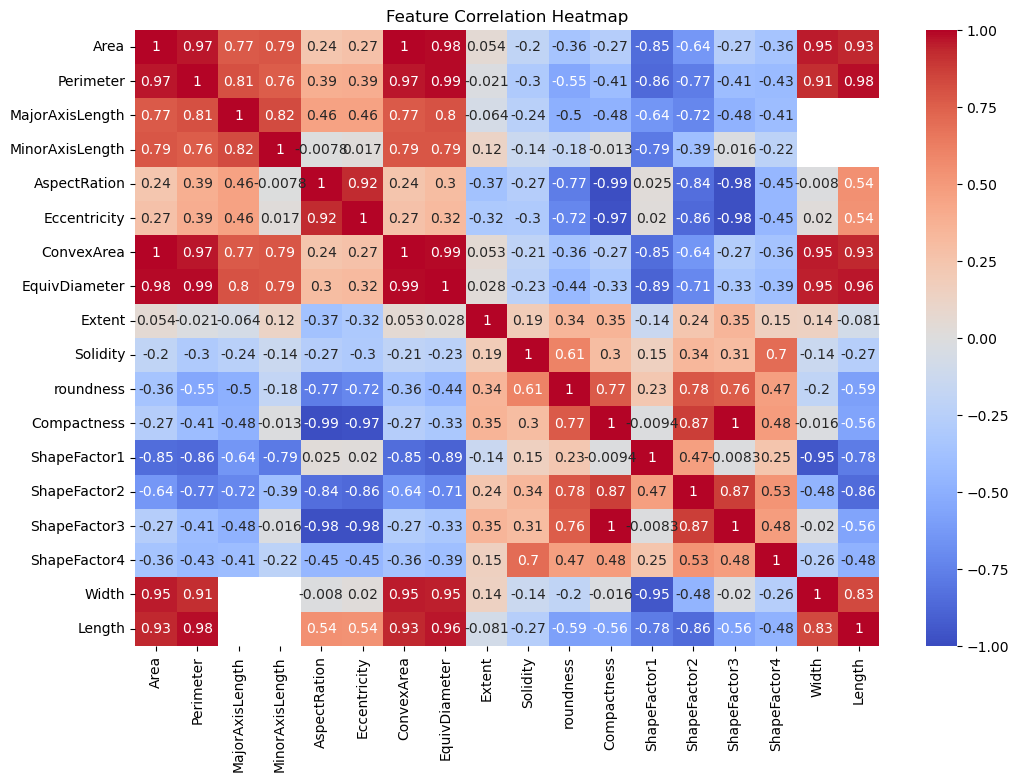

In [ ]:
# Generate the correlation matrix
correlation_matrix = merged_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()


### It seems that length- perimeter, length-equivdiameter, width-area have really strong correlation.

In [24]:
if merged_data.isnull().values.any():
    # Option 1: Fill remaining NaNs with column means
    merged_data.fillna(merged_data.mean(), inplace=True)


# Replace infinite values with column mean
merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_data.fillna(merged_data.mean(), inplace=True)

# Verify no missing or infinite values are present
print(merged_data.isnull().sum().sum()) 

27381


C:\Users\Arda Deniz\AppData\Local\Temp\ipykernel_23208\2009751838.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_data.fillna(merged_data.mean(), inplace=True)
C:\Users\Arda Deniz\AppData\Local\Temp\ipykernel_23208\2009751838.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_data.fillna(merged_data.mean(), inplace=True)


## I have ensured there is no NaN value

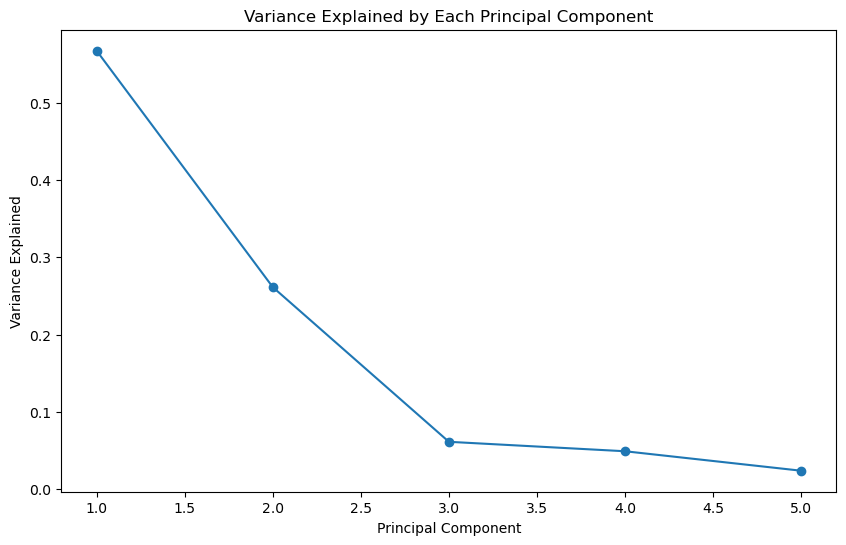

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(merged_data[numeric_columns])

# Explained variance by each component
explained_variance = pca.explained_variance_ratio_

# Plot the variance captured by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.show()


### The PCA plot shows the proportion of variance accounted for by each principal component. Here is a summary of what it shows:

### First Principal Component: This is the most important component of data which explains more than 50% variance in data. Second PC: About 30% of the variance. These two together explain over 80% of the variance in the data, implying most of the data information can be conveyed in two dimensions. Other Components: Each of the third, fourth, and fifth components explains less than 10% additional variance. 

### Conclusion: Dimensionality reduction to 2 principal components seems reasonable since those first two components explain the majority of the variance. This may facilitate visualization and further analysis with little loss of information. This means that we have most of the variation of the data in a compressed form, as PCA has shown us the basic structure of the data very well.